<center><font size="10"> 🔥Support Vector Machines🔥 </font></center>

<font size="6"> Linear SVM Classification </font>

#### Think of an SVM classifier as linearly splitting the data into classes with the widest possible highway. This is called large margin classification.

### Soft Margin Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris['data'][:, (2,3)]
y = (iris["target"] == 2).astype(np.float64)

In [4]:
svm_clf = Pipeline([
                ("scaler", StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss="hinge"))
                ])

In [5]:
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, loss='hinge'))])

In [6]:
svm_clf.predict([[5.5,1.7]])

array([1.])

<font size="6"> NonLinear SVM Classification </font>

In [12]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

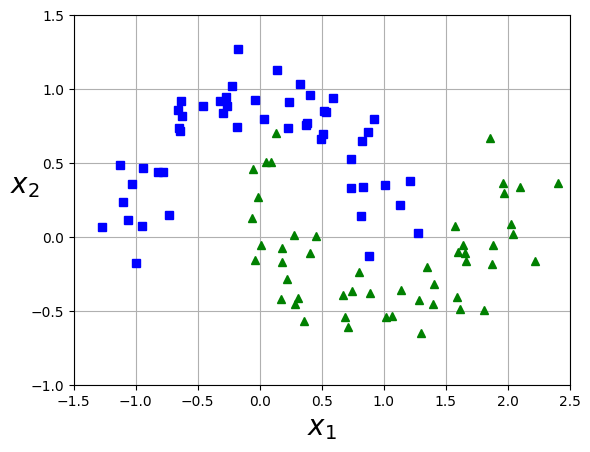

In [13]:
X, y = make_moons(n_samples=100, noise = 0.15, random_state=42)
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [14]:

poly_svm_clf = Pipeline([
                        ('poly_features', PolynomialFeatures(degree=3)),
                        ("scaler", StandardScaler()),
                        ('svm_clf',LinearSVC(C=10, loss="hinge"))
                        ])
poly_svm_clf.fit(X,y)

c:\Users\unnikris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [15]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

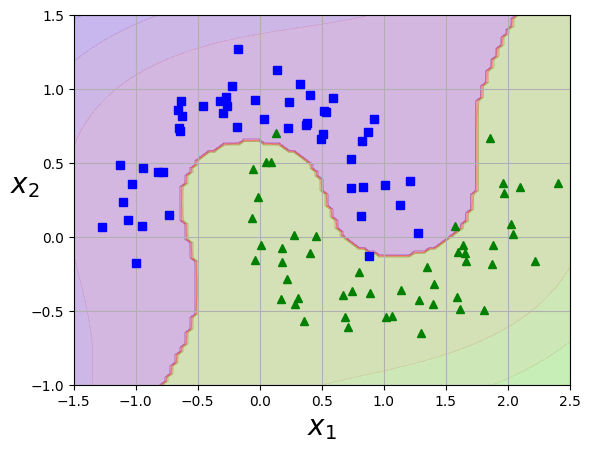

In [17]:
plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show();

In [19]:
from sklearn.svm import SVC

In [20]:
poly_svm_clf_kernel = Pipeline([
                            ("scaler", StandardScaler()),
                            ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
                            ])

poly_svm_clf_kernel.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

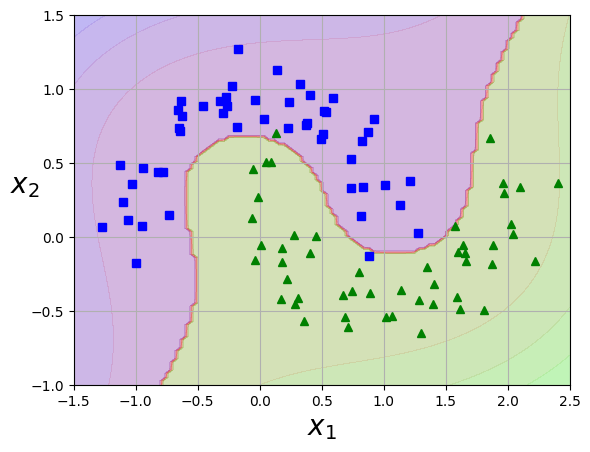

In [21]:
plot_predictions(poly_svm_clf_kernel, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show();

### Gaussian Radial Basis Function

In [22]:
rbf_kernel_svm_clf = Pipeline([
                            ('scaler', StandardScaler()),
                            ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001)),
                            ])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

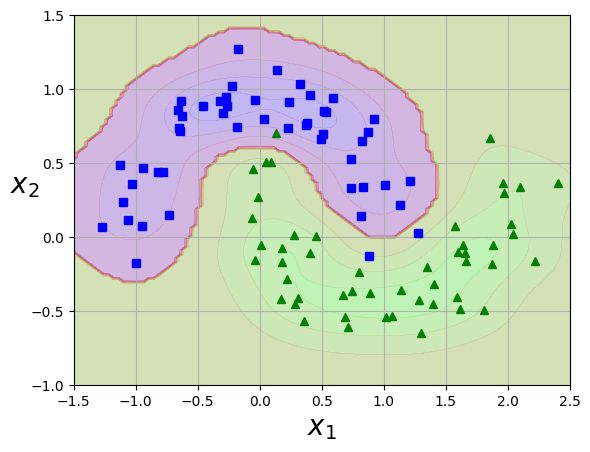

In [23]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show();

## SVM Regression

#### instead of trying to fit the largest street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations. The width of the street is controlled by a hyperparameter ϵ.

In [38]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [39]:
from sklearn.svm import LinearSVR

In [40]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

In [46]:
def find_sv(svm_reg,X,y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y-y_pred)>= svm_reg.epsilon)
    return np.argwhere(off_margin)

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support], y[svm_reg.support], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

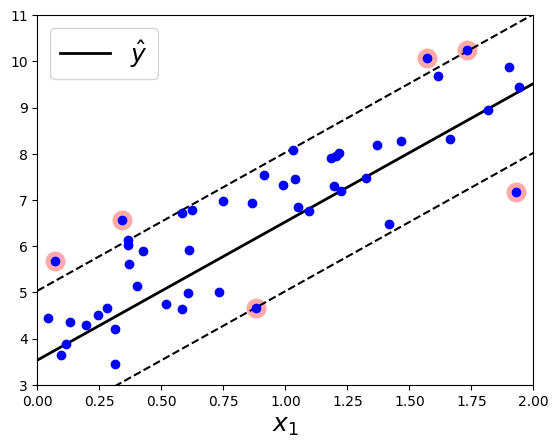

In [47]:
svm_reg.support = find_sv(svm_reg, X, y)
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])

In [48]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly', degree = 2, C = 100, epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

In [ ]:
def find_sv(svm_poly_reg,X,y):
    y_pred = svm_poly_reg.predict(X)
    off_margin = (np.abs(y-y_pred)>= svm_poly_reg.epsilon)
    return np.argwhere(off_margin)

def plot_svm_poly_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_poly_reg.support], y[svm_poly_reg.support], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

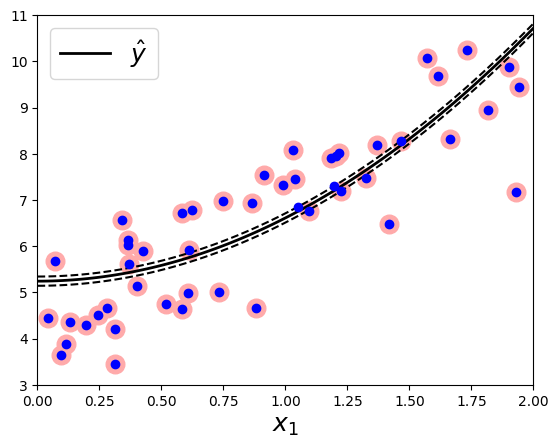

In [50]:
svm_poly_reg.support = find_sv(svm_poly_reg, X, y)
plot_svm_regression(svm_poly_reg, X, y, [0, 2, 3, 11])